In [ ]:
# Attainable Contingent Claims
# Three state economy

import numpy as np
from numpy.random import default_rng
np.set_printoptions(precision=5, suppress=True)

rng = default_rng(100)

B = (10, np.array((11, 11, 11)))
S = (10, np.array((20, 10, 5)))

n = 1000            # Number of portfolios to be simulated
b = rng.random(n)   # The random position in the bond with some examples - all position values are between 0 and 1
s = rng.random(n)   # The random position in the stock 


A = [b[i] * B[1] + s[i] * S[1] for i in range(n)]   # A list comprehension that calculates the resulting payoff vectors from the random portfolio compositions. 
A = np.array(A)                                     # A list comprehension that calculates the resulting payoff vectors from the random portfolio compositions.
print(f"A array: {A}")

A array: [[19.86232 14.52356 11.85418]
 [26.35796 16.46003 11.51106]
 [11.64939  7.41344  5.29547]
 ...
 [17.69706 13.4131  11.27112]
 [ 5.67191  2.99421  1.65536]
 [16.68661  9.22709  5.49734]]


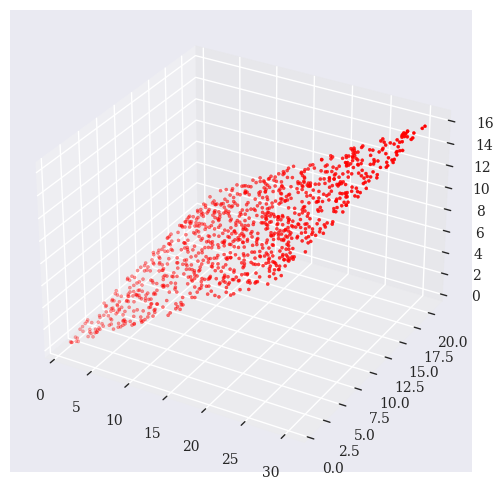

In [11]:
from pylab import mpl, plt

plt.style.use('seaborn-v0_8')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))                           # Empty canvas created
ax = fig.add_subplot(111, projection='3d')                  # A subplot for a three-dimensional object is added
ax.scatter(A[:, 0], A[:, 1], A[:, 2], c='r', marker='.')    # The payoff vectors are visualized as a rod dot each

In [12]:
Q = np.array((0.3, 0.3, 0.4))
np.dot(Q, S[1])

np.float64(11.0)

In [28]:
# Super Replication
B = (10, np.array((11, 11, 11)))    # Bond prices
C1 = np.array((1, 0, 0))            # The payoff of the contingent claim (first Arrow-Debreu security)
1 / B[1][0] * B[1] >= C1            # The portfolio with the bond only checked for the super-replication characteristic
cost = 1 / B[1][0] * B[0]
print(f"Cost to set up bond portfolio: {cost:.3f}")

# A function to calculate the value of a portfolio phi today, t=0, or in one year, t = 1
def V(phi, t): 
     return phi[0] * B[t] + phi[1] * S[t]
phi = np.array((0.04, 0.03)) # Another guess for a super-replicating portfolio

set_up = V(phi, 0) # The cost to set it up, which is lower than with the bond only 
print(f"The cost to set up is : {set_up}")

payoff= V(phi, 1)
print(f"The resulting payoff in one year: {payoff}")


Cost to set up bond portfolio: 0.909
The cost to set up is : 0.7
The resulting payoff in one year: [1.04 0.74 0.59]


In [34]:
from scipy.optimize import minimize

# Define the inequality constraints in vectorized fashion based on a lambda (or anonymous) function
cons = ({'type': 'ineq', 'fun':lambda phi: V(phi, 1) - C1})

res = minimize(lambda phi: V(phi, 0),   # The function to be minimized
               (0.01, 0.01),            # An initial guess for the optimal solution
               method='SLSQP',          # The method to be used for the minimization, here, Sequential Least Squares Programming (SLSQP)
               constraints=cons)        # The constraints for the minimization problem as defined before
print(f"Results: {res}") # The complete results dictionary from the minimization, with the optimal paramaters under x and the minimial function value under fun.

today_value = V(res['x'], 0)      # The value of the optimal super-replicating portfolio today
print(f"Cost of replicating portfolio today: {today_value}")

future_value = V(res['x'], 1)       # The future uncertain value of the optimal super-replicating portfolio; 
                                    # the optimal portfolio that sells short the bond and goes long the stock exactly 
                                    # replicates the relevant payoff in two states and only super-replicates in the middle state
print(f"Future uncertain value of the optimal super-replicating portfolio: {future_value}")

Results:      message: Optimization terminated successfully
     success: True
      status: 0
         fun: 0.36363636364010504
           x: [-3.030e-02  6.667e-02]
         nit: 2
         jac: [ 1.000e+01  1.000e+01]
        nfev: 6
        njev: 2
 multipliers: [ 3.636e-01  0.000e+00  5.455e-01]
Cost of replicating portfolio today: 0.36363636364010504
Future uncertain value of the optimal super-replicating portfolio: [1.      0.33333 0.     ]


In [44]:
M = np.array((B[1], S[1])).T            # The future price matrix of the two traded financial assets
reg = np.linalg.lstsq(M, C1, rcond=-1)  # This solves the linear OLS regression problem by minimizing the MSE (Mean Squared Error)
# reg Output:   #(array([-0.04545,  0.07143]), The optimal portfolio positions, that is, the solution to the problem
                # array([0.07143]),            The MSE obtained from the optimization procedure
                # np.int32(2),                 Rank of matrix M...
                # array([28.93836,  7.11136])) ...and its singluar values
approximate_portfolio_value = V(reg[0], 0)  # The value of the approximate portfolio (lower than the value of the cost-minimizing portfolio)
print(f"Value of the approximate portfolio: {approximate_portfolio_value:.4f}")

approximate_portfolio_payoff = V(reg[0], 1) # The payoff of the approximation portfolio
print(f"Approximation portfolio payoff: {approximate_portfolio_payoff}")

rep_errors = V(reg[0], 1) - C1 # The vector with the replication errors
print(f"Vector with replication errors: {rep_errors}")

ar_mean = np.mean((V(reg[0], 1) - C1) ** 2) # The MSE from the approximate replication
print(f"MSE from approximate replication: {ar_mean}")

Value of the approximate portfolio: 0.2597
Approximation portfolio payoff: [ 0.92857  0.21429 -0.14286]
Vector with replication errors: [-0.07143  0.21429 -0.14286]
MSE from approximate replication: 0.023809523809523808


Expected return for market portfolio: 0.16666666666666674
Volatility of the returns of the market value: 0.6236095644623235


Text(0, 0.5, 'μ')

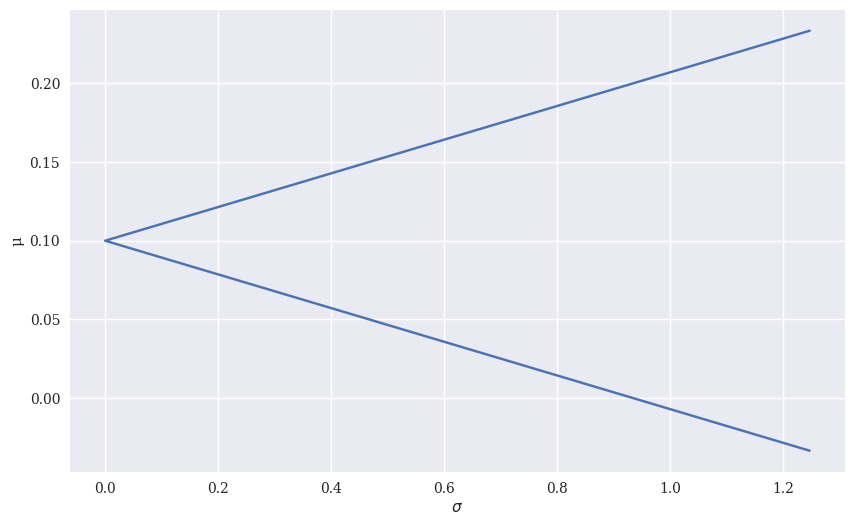

In [55]:
# Capital Market Line
# This is the mathematical foundation of index fund investing and modern portfolio theory

mu_S = 7 / 6 - 1 # The expected return of the market portfolio
print(f"Expected return for market portfolio: {mu_S}")

sigma_S = (S[1] / S[0]).std() # The volatility of the returns of the market portfolio. NOTE: This calculation for the volatility is only valid since an equal probabliity is assumed for the three states. 
print(f"Volatility of the returns of the market value: {sigma_S}")

s = np.linspace(-2, 2, 25)  # The market portfolio position takes on values between -200% and 200%
b = (1 - s)                 # The bond portfolio postition fills up to 100% total portfolio weight
i = 0.1                     # The risk-less interest rate

mu = b * i + s * mu_S       # The resulting expected rates of return for the portfolio
sigma = np.abs(s * sigma_S) # The resulting volatility values for the portfolio.

plt.figure(figsize=(10,6))
plt.plot(sigma, mu)         # Plots the CML for short as well as long postitions in the market portfolio. 
plt.xlabel(r'$\sigma$')
plt.ylabel('μ')


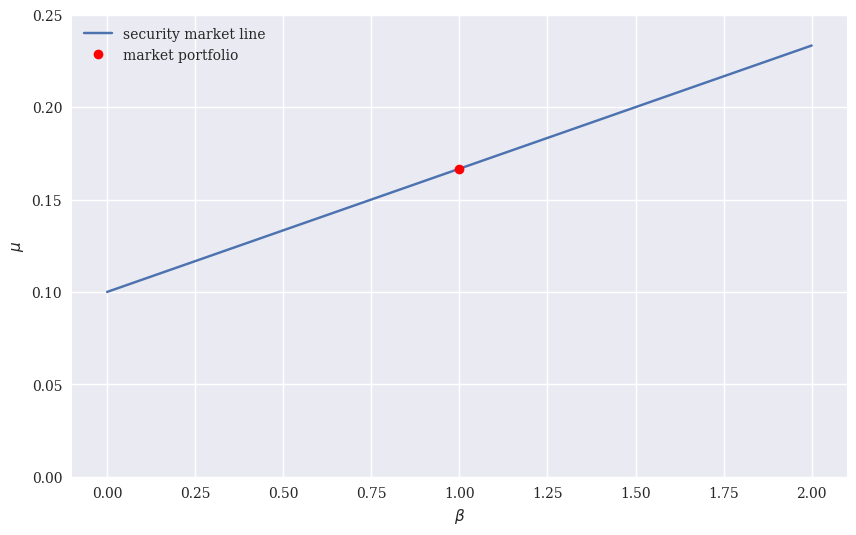

In [ ]:
# Capital Asset Pricing Model
# Important risk-return relationship 

beta = np.linspace(0, 2, 25)    # Generates an ndarray object with the beta values
mu = i + beta * (mu_S - i)      # Calculates the expected returns, mu, according to the CAPM (Capital Asset Pricing Model)

plt.figure(figsize=(10, 6))
plt.plot(beta, mu, label='security market line') # Plots the beta-mu combinations
plt.xlabel('$\\beta$')
plt.ylabel('$\\mu$')
plt.ylim(0, 0.25) # Adjusts the limits for the y-axis
plt.plot(1, mu_S, 'ro', label='market portfolio')
plt.legend(loc=0);
